In [138]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [139]:
# read data into jupyter
app_ene_predict_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")
app_ene_predict_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [140]:
#data stats
app_ene_predict_data.describe(include = "all")

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-03-19 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


In [141]:
#select a sample of the dataset
simple_linear_reg_app_ene_predict_data_df = app_ene_predict_data[["T2", "T6"]].sample(30, random_state = 42)

<AxesSubplot:xlabel='T2', ylabel='T6'>

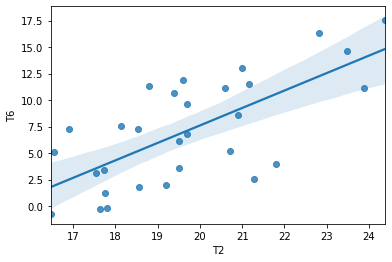

In [142]:
#simple regression plot
sns.regplot(x = "T2", y = "T6", data = app_ene_predict_data_df)

In [143]:
# normalize dataset to a common scale using min max scaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(app_ene_predict_data.drop(columns=["date", "lights"])), columns=app_ene_predict_data.drop(columns=["date", "lights"]).columns)              
features_df = normalised_df.drop(columns=["Appliances"])
appliance_target = normalised_df.Appliances

In [144]:
# split dataset into training and testing datset
x_train, x_test, y_train, y_test = train_test_split(features_df, appliance_target, test_size = 0.3, random_state = 42)

In [145]:
# fit model to training dataset
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [146]:
#mae = mean absolute error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.05

In [147]:
#residual sum of squares (rss)
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

45.35

In [158]:
# root mean square error (rmse)
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [149]:
#r squared
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.15

In [154]:
np.corrcoef(y_test, predicted_values)

array([[1.        , 0.38622248],
       [0.38622248, 1.        ]])

In [162]:
# Ridge regression
ridge_reg = Ridge(alpha = 0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [163]:
# root mean square error (rmse)
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [161]:
# Feature Selection and Lasso Regression
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [128]:
#comparing the effects of regularisation.  #function returns the weights of every feature
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df
linear_model_weights =  get_weights_df(linear_model, x_train, "Linear_Model_Weight")
ridge_weights_df = get_weights_df(ridge_reg, x_train, "Ridge_Weight")
lasso_weights_df = get_weights_df(lasso_reg, x_train, "Lasso_Weight")
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on = "Features")
final_weights = pd.merge(final_weights, lasso_weights_df, on = "Features")
round(final_weights, 3)

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,RH_2,-0.457,-0.401,-0.000
1,T_out,-0.322,-0.251,0.000
2,T2,-0.236,-0.194,0.000
3,T9,-0.190,-0.189,-0.000
4,RH_8,-0.158,-0.157,-0.000
5,RH_out,-0.078,-0.051,-0.050
6,RH_7,-0.045,-0.046,-0.000
7,RH_9,-0.040,-0.042,-0.000
8,T5,-0.016,-0.021,-0.000
9,T1,-0.003,-0.022,0.000
